In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [37]:
data = pd.read_excel('/content/porsche_911_final1.xlsx')


In [38]:
data['start_of_production'] = pd.to_datetime(data['start_of_production'], format='%Y')
data['end_of_production'] = pd.to_datetime(data['end_of_production'], format='%Y')

In [39]:
#converting object columns that should be in numeric
numeric_columns = [
    'acceleration_0-100km/h', 'acceleration_0-62mph', 'maximum_speed',
    'weight-to-power_ratio_kg/hp', 'weight-to-power_ratio_hp/kg',
    'weight-to-torque_ratio_kg/nm', 'weight-to-torque_ratio_nm/kg(tonne)',
    'power_per_litre', 'torque_nm', 'torque_rpm', 'engine_displacement',
    'cylinder_bore', 'piston_stroke', 'number_of_valves_per_cylinder',
    'kerb_weight', 'max_weight', 'max_load', 'fuel_tank_capacity',
    'length', 'width', 'height', 'minimum_turning_diameter',
    'Front_tyre_ratio', 'Rear_tyre_ratio',
    'fuel_consumption_extra_urban', 'fuel_consumption_combined',
    'co2_emissions', 'compression_ratio', 'engine_oil_capacity',
    'front_track', 'rear_track', 'drag_coefficient',
    'acceleration_0-60mph', 'coolant'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical columns to category type
categorical_columns = [
    'generation', 'engine', 'body_type', 'engine_layout',
    'fuel_injection_system', 'engine_aspiration', 'drive_wheel',
    'number_of_gears_and_type_of_gearbox', 'Automation_type',
    'front_suspension', 'rear_suspension', 'front_brakes', 'rear_brakes',
    'assisting_systems', 'power_steering', 'emission_standard'
]

for col in categorical_columns:
    data[col] = data[col].astype('category')

# Convert boolean-like columns to boolean
boolean_columns = ['assisting_systems', 'power_steering']
for col in boolean_columns:
    data[col] = data[col].map({'Yes': True, 'No': False})

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 63 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   link                                       288 non-null    object        
 1   generation                                 288 non-null    category      
 2   engine                                     288 non-null    category      
 3   start_of_production                        288 non-null    datetime64[ns]
 4   body_type                                  288 non-null    category      
 5   seats                                      288 non-null    int64         
 6   acceleration_0-100km/h                     255 non-null    float64       
 7   acceleration_0-62mph                       255 non-null    float64       
 8   maximum_speed                              276 non-null    float64       
 9   weight-to-power_ratio

In [41]:
# List of values to consider as null
null_values = ["", "NA", "N/A", "null", "NULL", "none", "None", "-", "?"]

# Replace null values with NaN
data = data.replace(null_values, np.nan)

# For numeric columns, also replace infinity values with NaN
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Optional: Print the percentage of null values in each column
print((data.isnull().sum() / len(data)) * 100)

link                     0.000000
generation               0.000000
engine                   0.000000
start_of_production      0.000000
body_type                0.000000
                          ...    
rear_track              30.902778
drag_coefficient        40.277778
acceleration_0-60mph    14.583333
end_of_production       12.152778
coolant                 49.652778
Length: 63, dtype: float64


In [28]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

In [42]:
for column in data.columns:
    if data[column].dtype == object:
        try:
            data[column] = data[column].astype(float)
        except ValueError:
            pass

In [48]:
data=data.where(pd.notnull(data),np.nan)

In [44]:
data.isnull().sum()

link                      0
generation                0
engine                    0
start_of_production       0
body_type                 0
                       ... 
rear_track               89
drag_coefficient        116
acceleration_0-60mph     42
end_of_production        35
coolant                 143
Length: 63, dtype: int64

In [45]:
data = data.replace(r'^\s*$', np.nan, regex=True).fillna(np.nan)
data.isnull().sum()

link                      0
generation                0
engine                    0
start_of_production       0
body_type                 0
                       ... 
rear_track               89
drag_coefficient        116
acceleration_0-60mph     42
end_of_production        35
coolant                 143
Length: 63, dtype: int64

In [46]:
from sklearn.impute import SimpleImputer

# Check if columns exist before dropping
if 'assisting_systems' in data.columns and 'power_steering' in data.columns:
    data = data.drop(['assisting_systems', 'power_steering'], axis=1)
else:
    print("Columns 'assisting_systems' and/or 'power_steering' not found in the DataFrame.")

# Drop columns with more than 95% null values
data = data.drop(data.columns[data.isnull().mean() > 0.95], axis=1)

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

# Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])

# Check remaining null values
print(data.isnull().sum())

link                                          0
generation                                    0
engine                                        0
start_of_production                           0
body_type                                     0
seats                                         0
acceleration_0-100km/h                        0
acceleration_0-62mph                          0
maximum_speed                                 0
weight-to-power_ratio_kg/hp                   0
weight-to-power_ratio_hp/kg                   0
weight-to-torque_ratio_kg/nm                  0
weight-to-torque_ratio_nm/kg(tonne)           0
hp                                            0
rpm                                           0
power_per_litre                               0
torque_nm                                     0
torque_rpm                                    0
engine_layout                                 0
engine_displacement                           0
number_of_cylinders                     

In [47]:
# Option 1: Fill with a future date if it represents ongoing production
data['end_of_production'] = data['end_of_production'].fillna(pd.Timestamp.now().year)

# OR

# Option 2: Fill with the mode (most frequent value)
mode_value = data['end_of_production'].mode()[0]
data['end_of_production'] = data['end_of_production'].fillna(mode_value)

# OR

# Option 3: Forward fill based on 'generation' or another relevant column
data = data.sort_values(['generation', 'start_of_production'])
data['end_of_production'] = data.groupby('generation')['end_of_production'].ffill()

# Check remaining null values
print(data.isnull().sum())

link                                         0
generation                                   0
engine                                       0
start_of_production                          0
body_type                                    0
seats                                        0
acceleration_0-100km/h                       0
acceleration_0-62mph                         0
maximum_speed                                0
weight-to-power_ratio_kg/hp                  0
weight-to-power_ratio_hp/kg                  0
weight-to-torque_ratio_kg/nm                 0
weight-to-torque_ratio_nm/kg(tonne)          0
hp                                           0
rpm                                          0
power_per_litre                              0
torque_nm                                    0
torque_rpm                                   0
engine_layout                                0
engine_displacement                          0
number_of_cylinders                          0
cylinder_bore

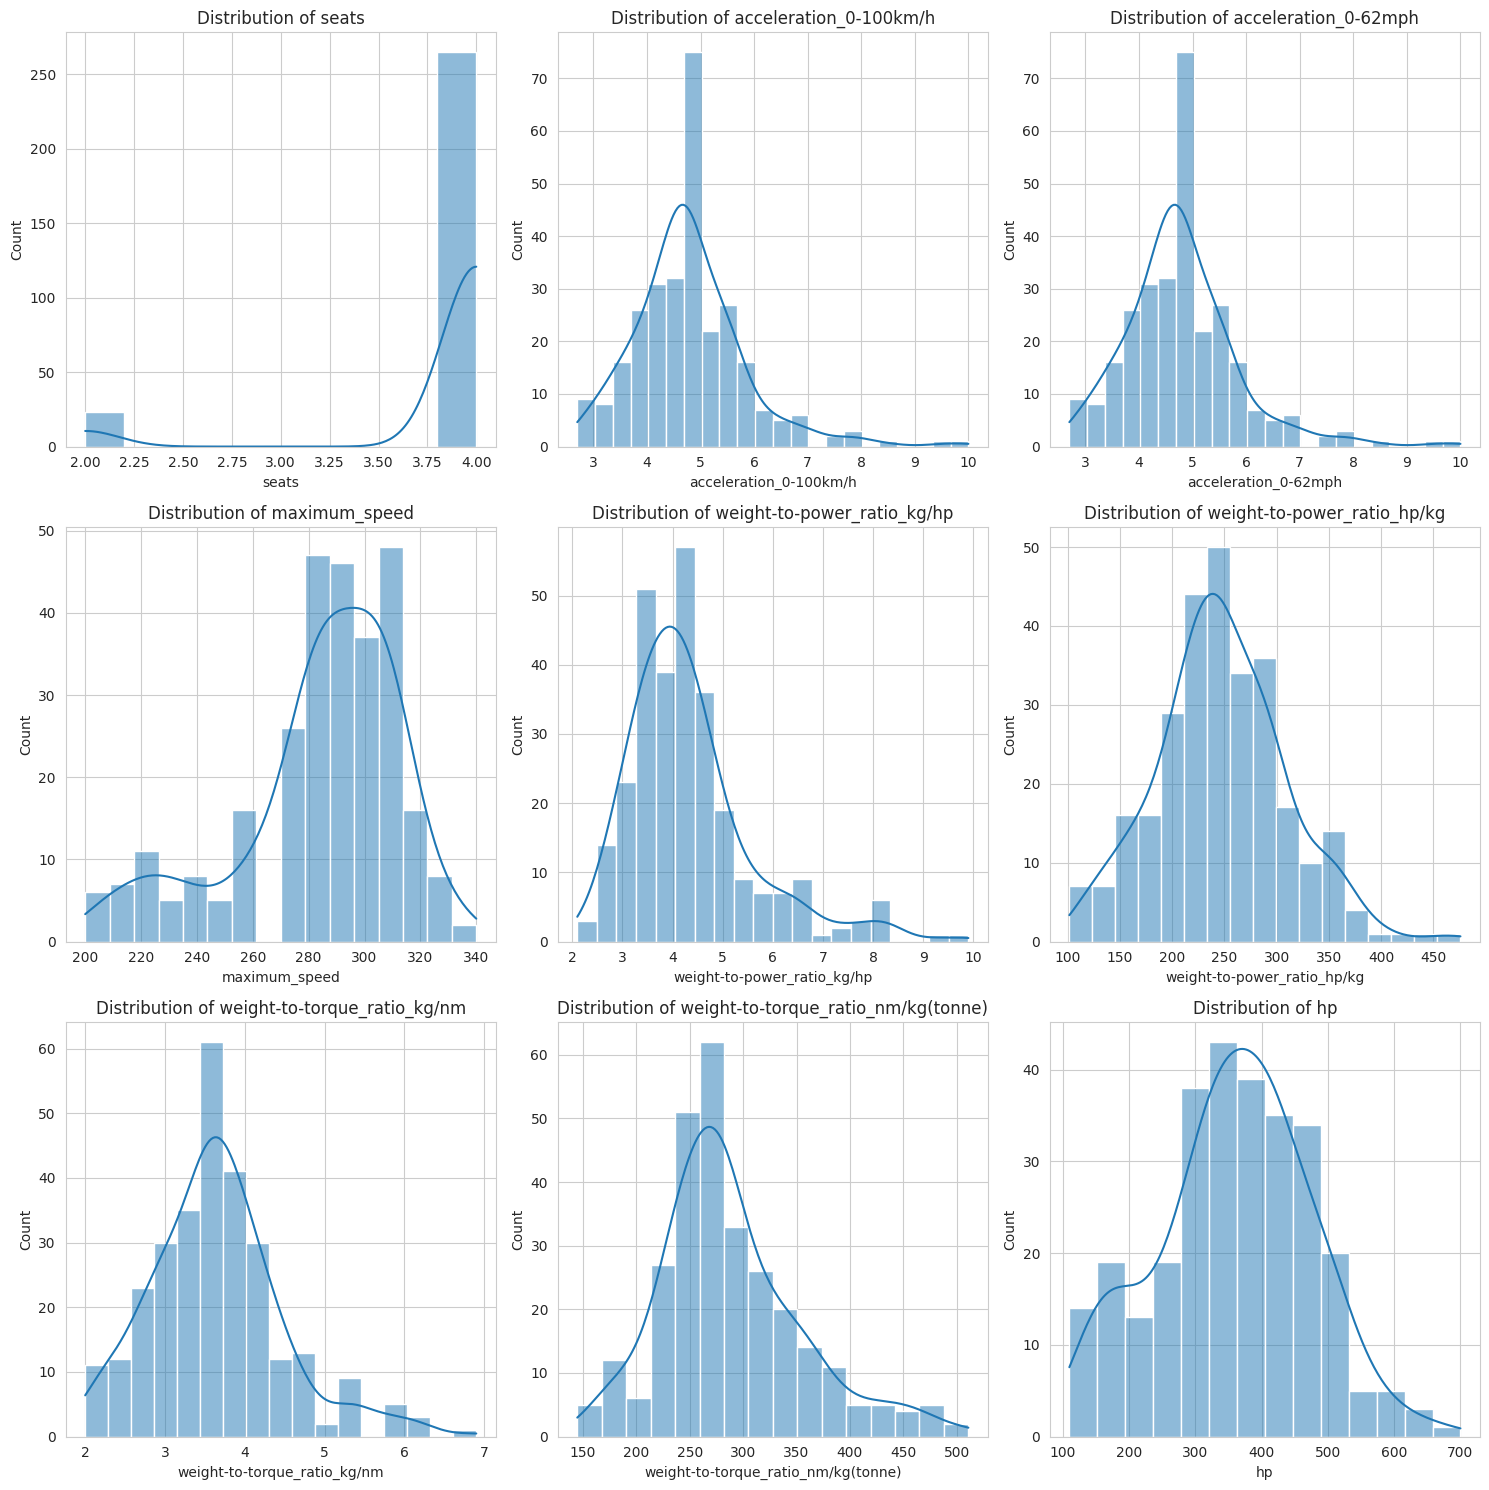

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data'

# Set the style for seaborn
sns.set_style("whitegrid")

# 1. Histogram of numerical columns
def plot_histograms(data, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        sns.histplot(data=data, x=column, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns[:9]  # Select first 9 numerical columns
plot_histograms(data, numerical_columns, 3, 3)



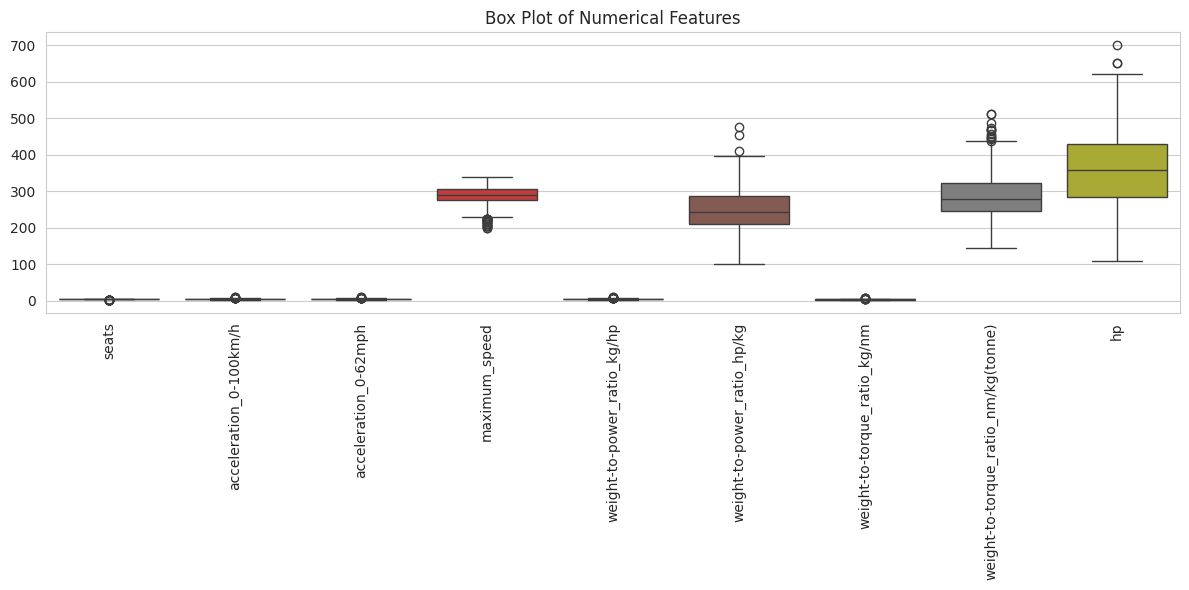

In [55]:
# 2. Box plot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


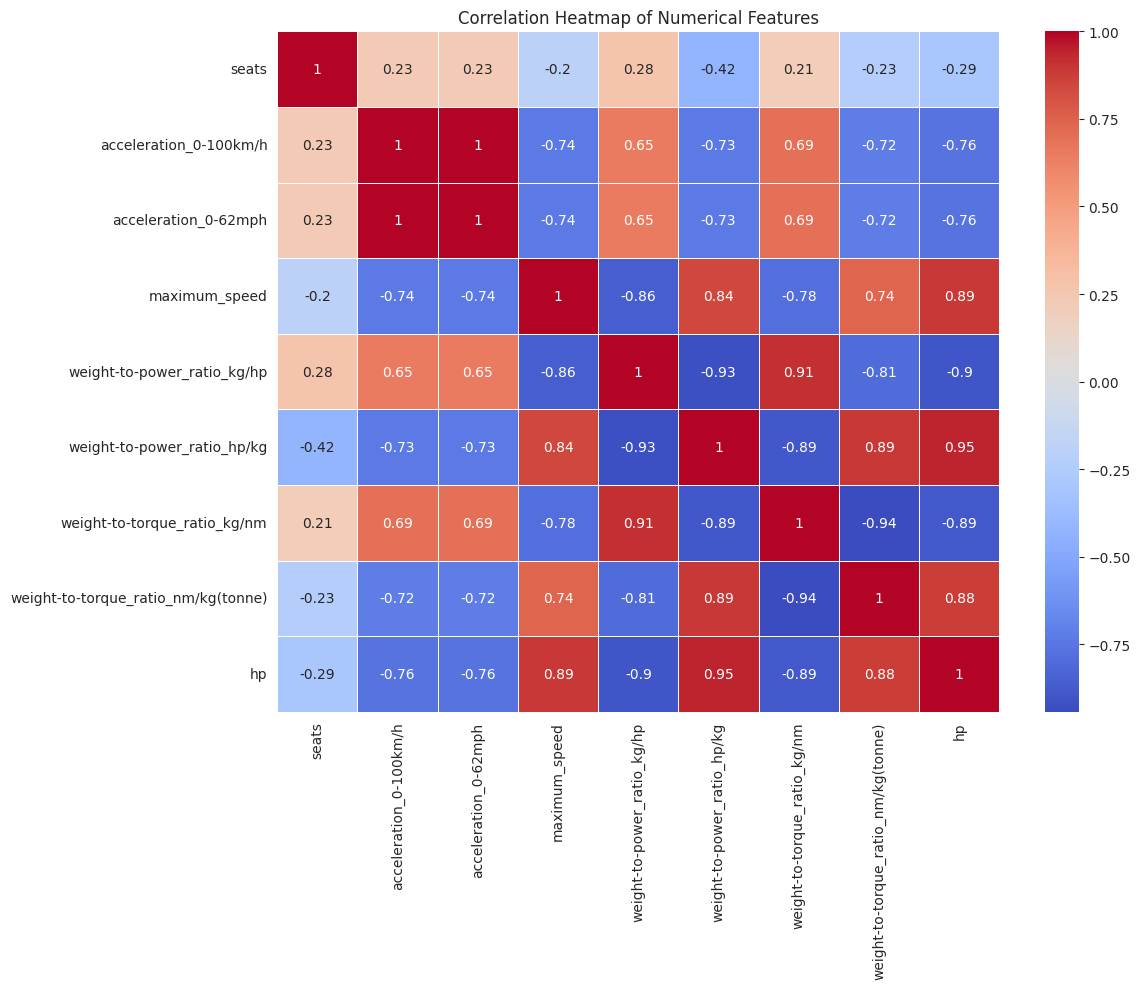

In [56]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


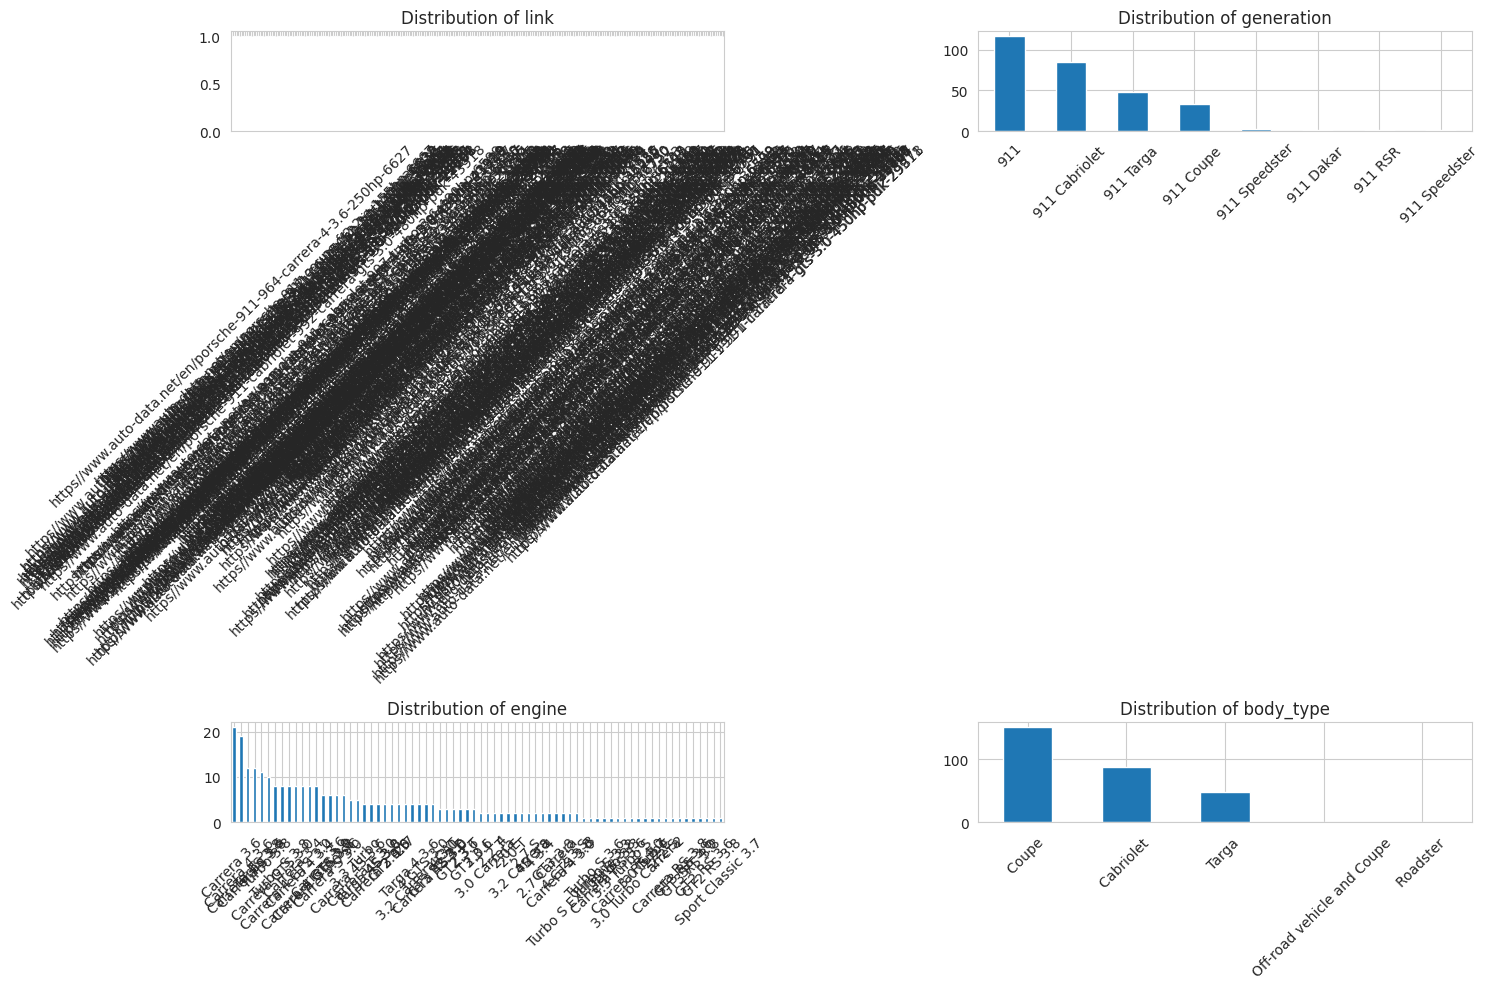

In [60]:
# 4. Bar plot for categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns[:4]  # Select first 4 categorical columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    data[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

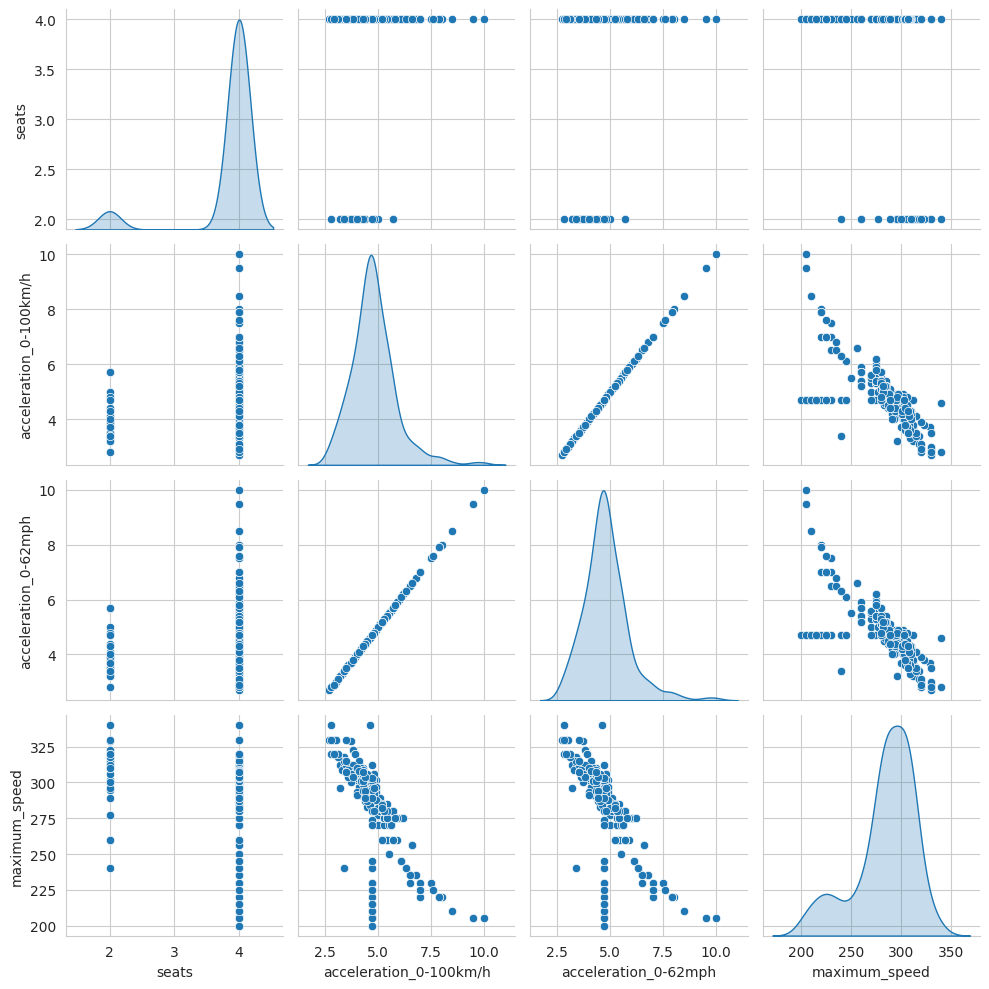

In [58]:
# 5. Scatter plot matrix
sns.pairplot(data[numerical_columns[:4]], diag_kind='kde')  # Using first 4 numerical columns
plt.tight_layout()
plt.show()

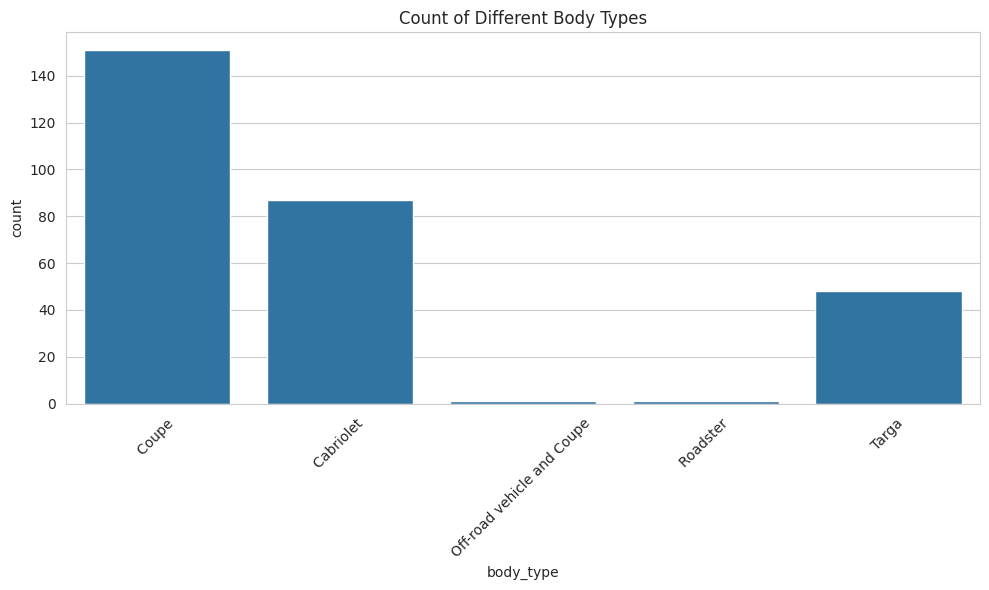

In [59]:
# 6. Count plot for a categorical column (e.g., 'body_type')
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='body_type')
plt.title('Count of Different Body Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

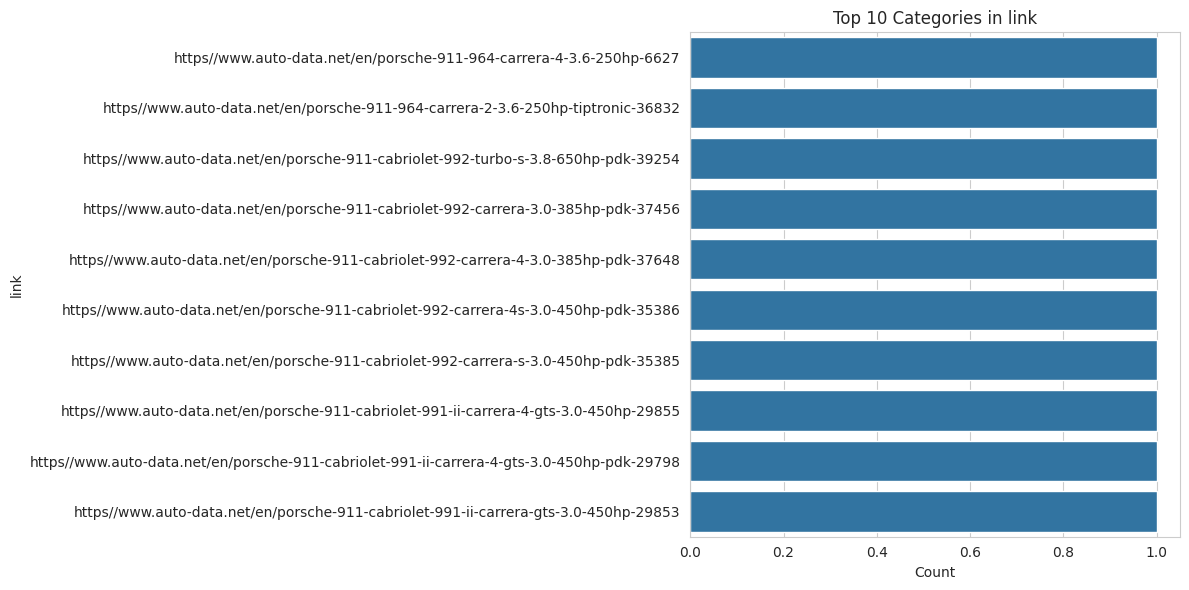

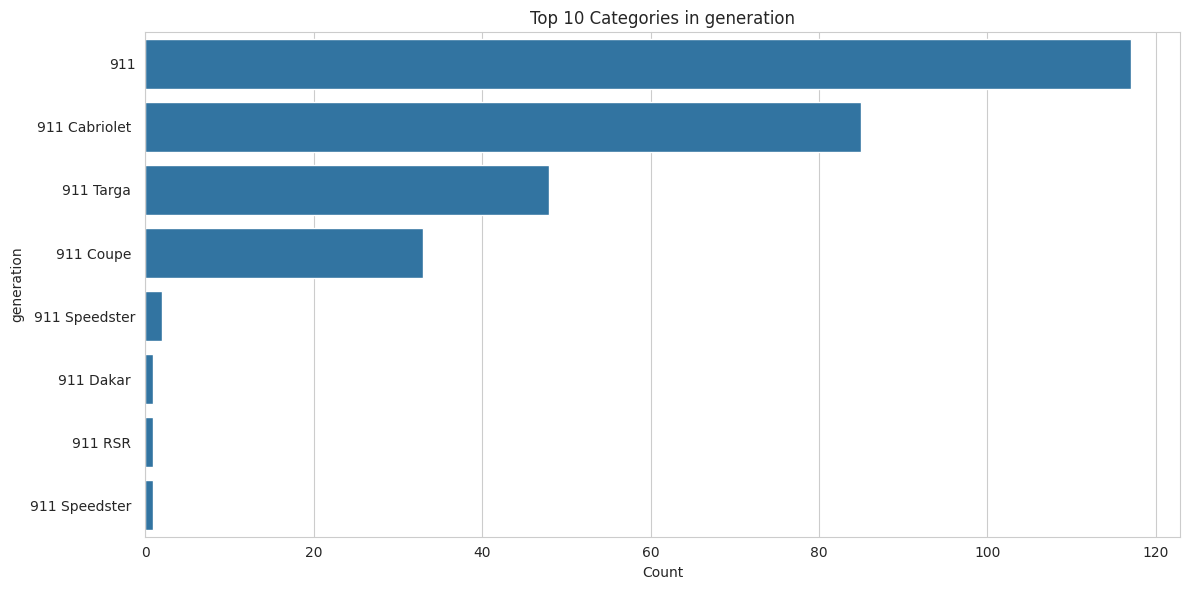

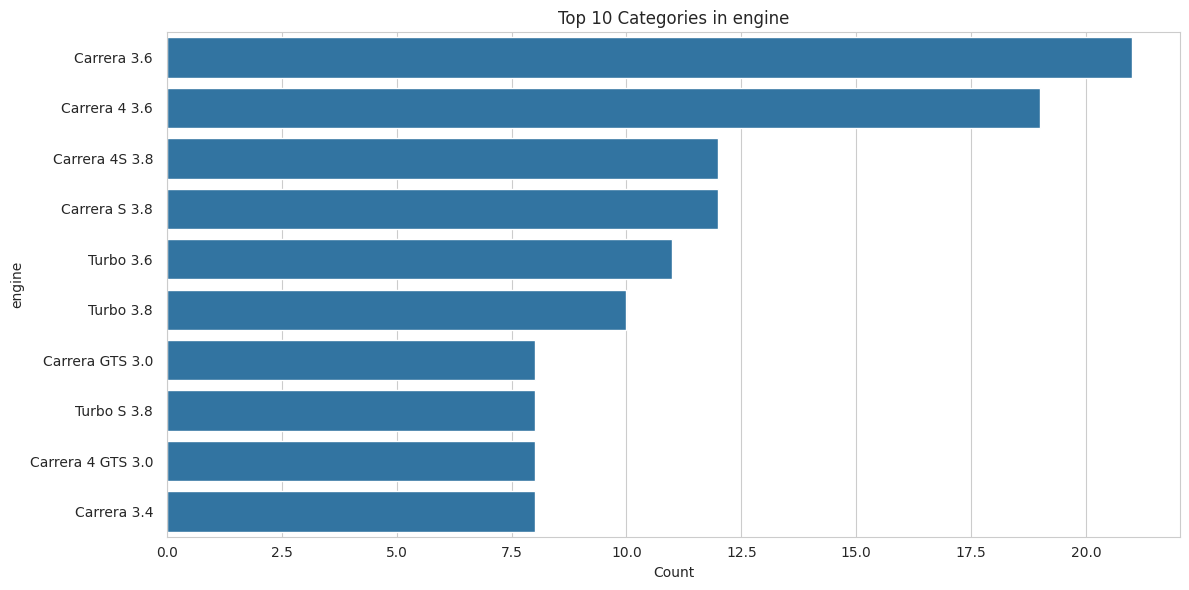

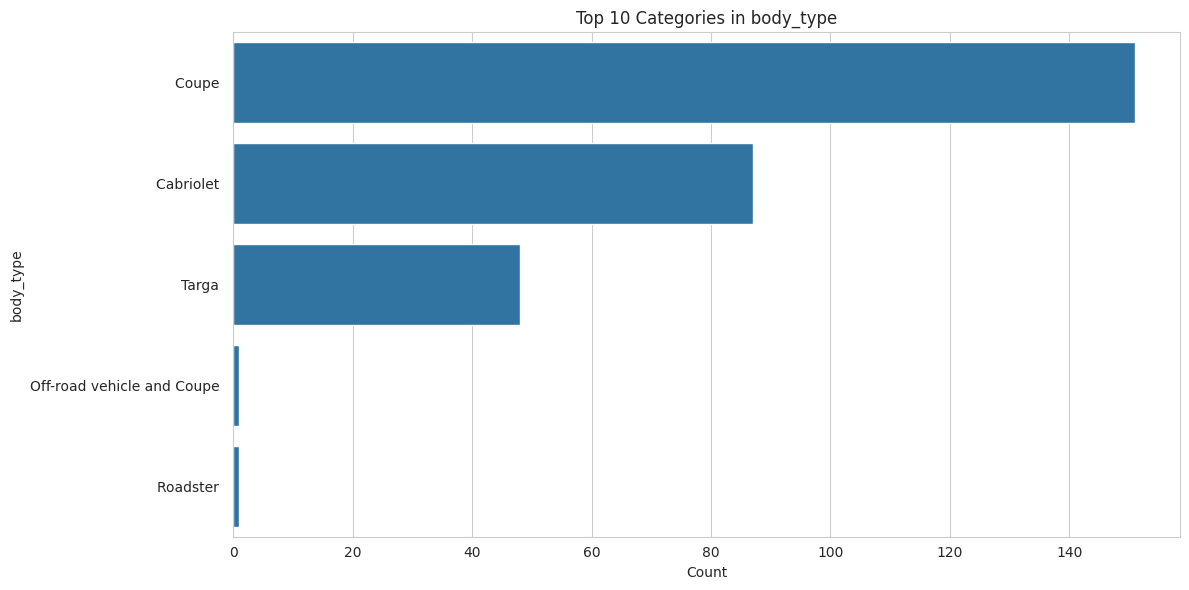

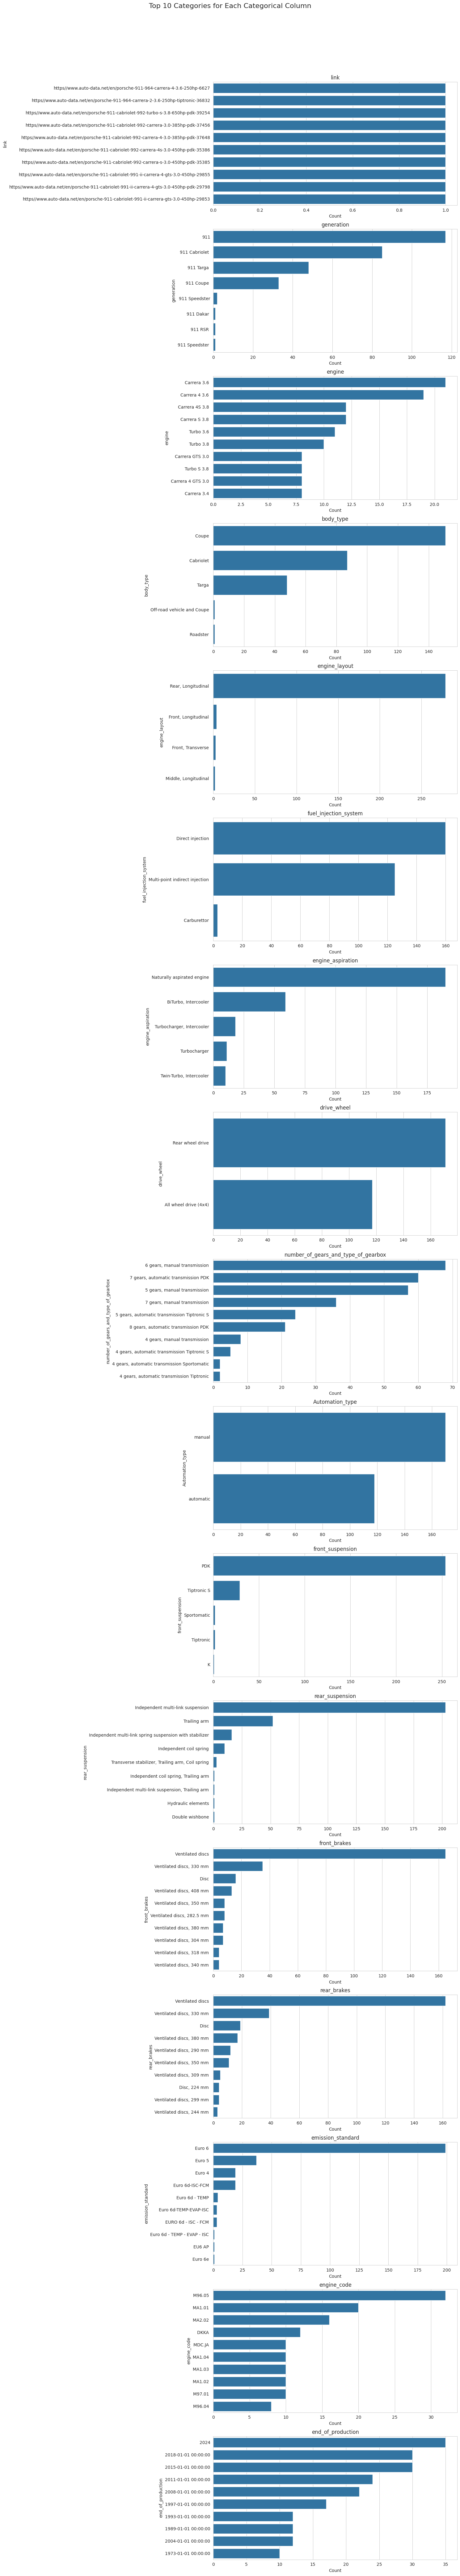

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'data'

def plot_top_categories(data, column, top_n=10):
    plt.figure(figsize=(12, 6))
    value_counts = data[column].value_counts()
    top_categories = value_counts.nlargest(top_n)

    sns.barplot(x=top_categories.values, y=top_categories.index, orient='h')
    plt.title(f'Top {top_n} Categories in {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# Select categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Plot top categories for each categorical column
for column in categorical_columns[:4]:  # Limit to first 4 categorical columns
    plot_top_categories(data, column)

# If you want to see all categorical columns in one figure:
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, 5*len(categorical_columns)))
fig.suptitle('Top 10 Categories for Each Categorical Column', fontsize=16)

for i, column in enumerate(categorical_columns):
    value_counts = data[column].value_counts()
    top_categories = value_counts.nlargest(10)

    sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[i], orient='h')
    axes[i].set_title(column)
    axes[i].set_xlabel('Count')

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap
plt.show()

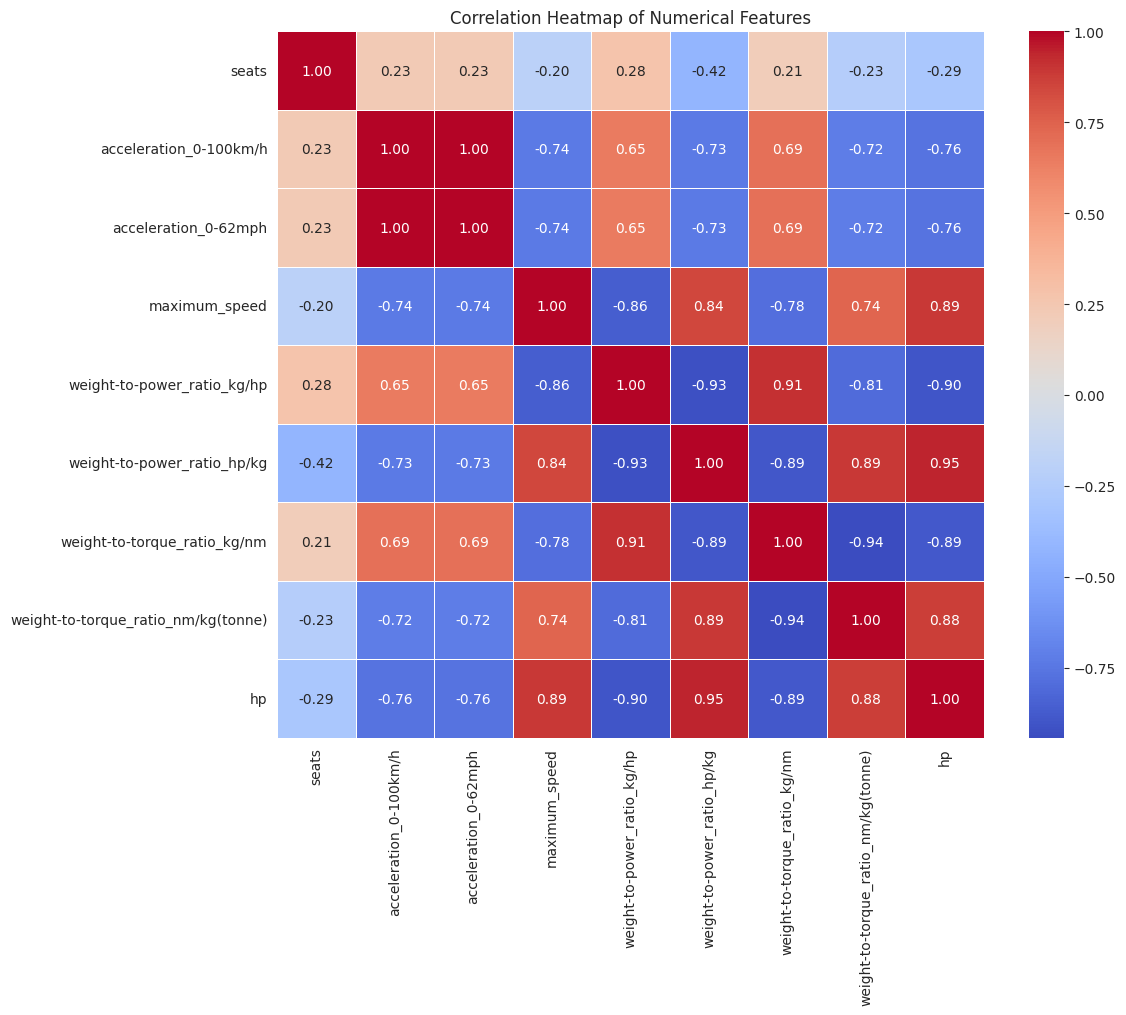

Top Correlations:
hp                                   weight-to-power_ratio_hp/kg            0.946795
weight-to-power_ratio_hp/kg          hp                                     0.946795
weight-to-torque_ratio_nm/kg(tonne)  weight-to-torque_ratio_kg/nm           0.942794
weight-to-torque_ratio_kg/nm         weight-to-torque_ratio_nm/kg(tonne)    0.942794
weight-to-power_ratio_kg/hp          weight-to-power_ratio_hp/kg            0.926030
dtype: float64


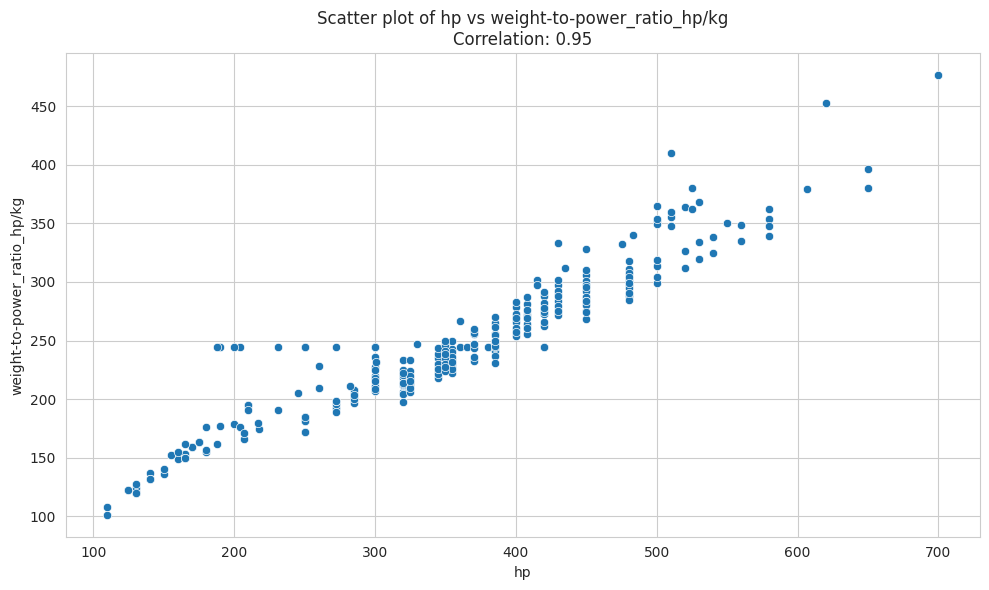

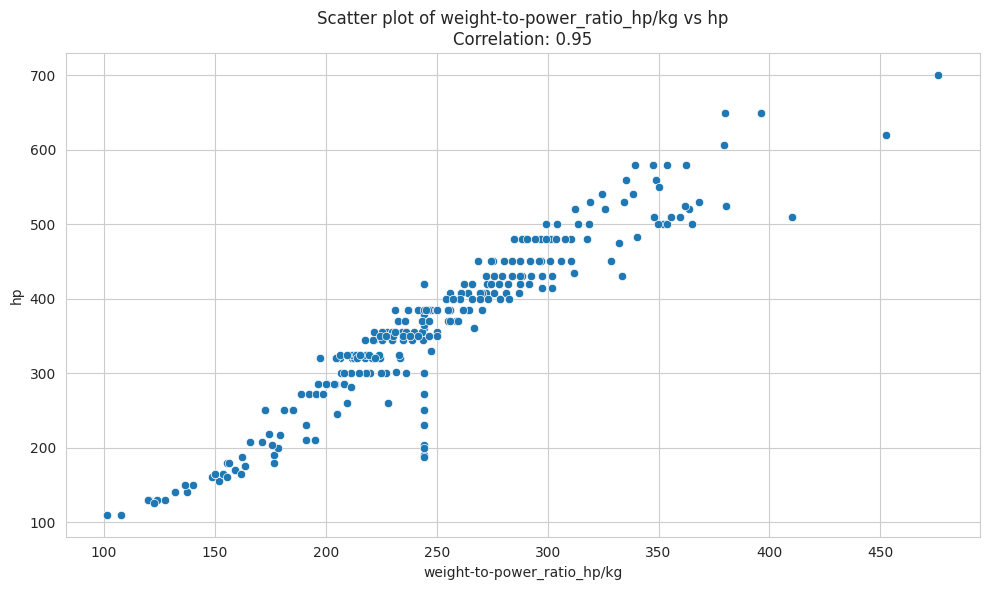

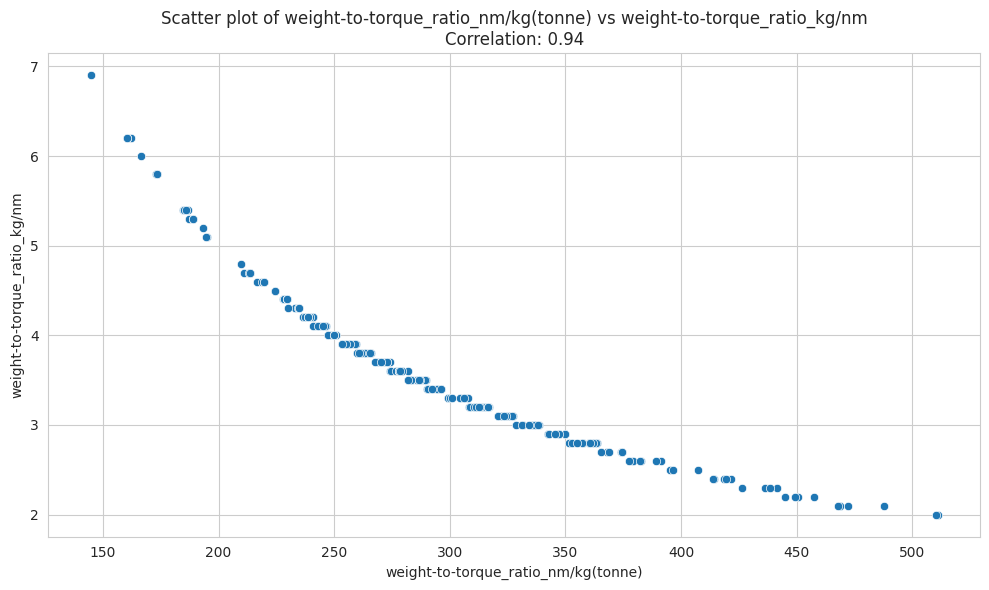

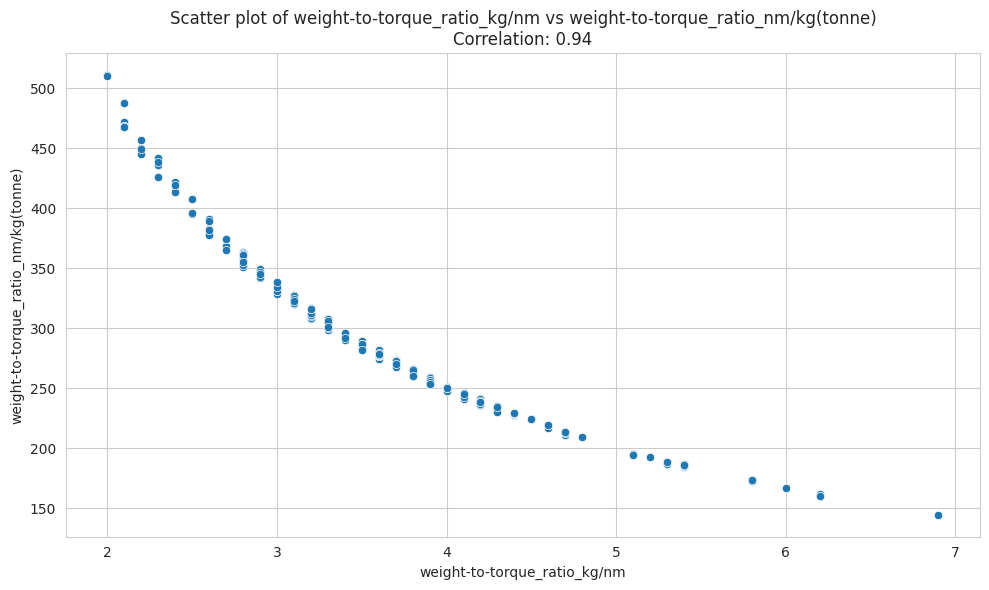

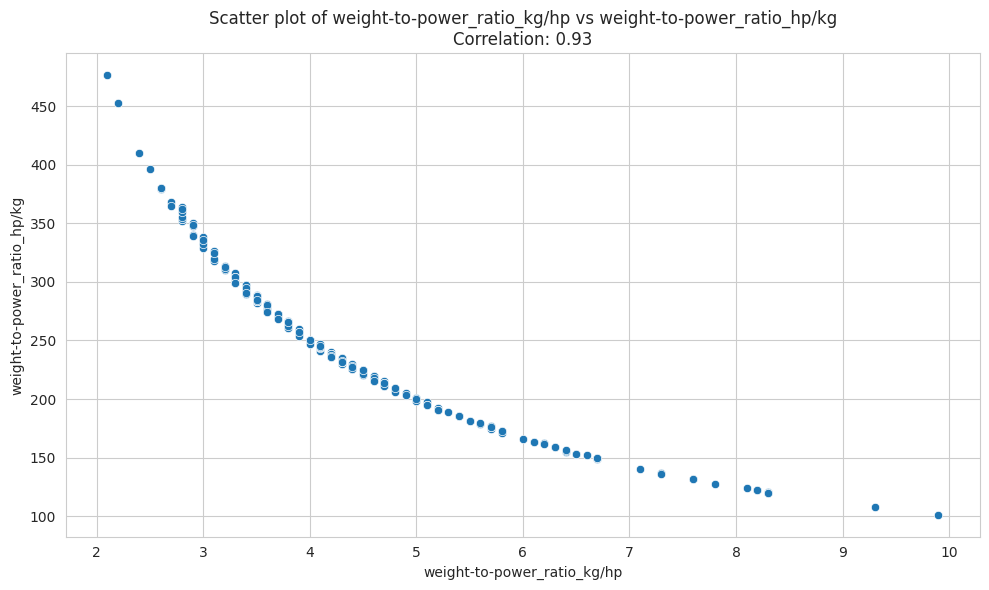

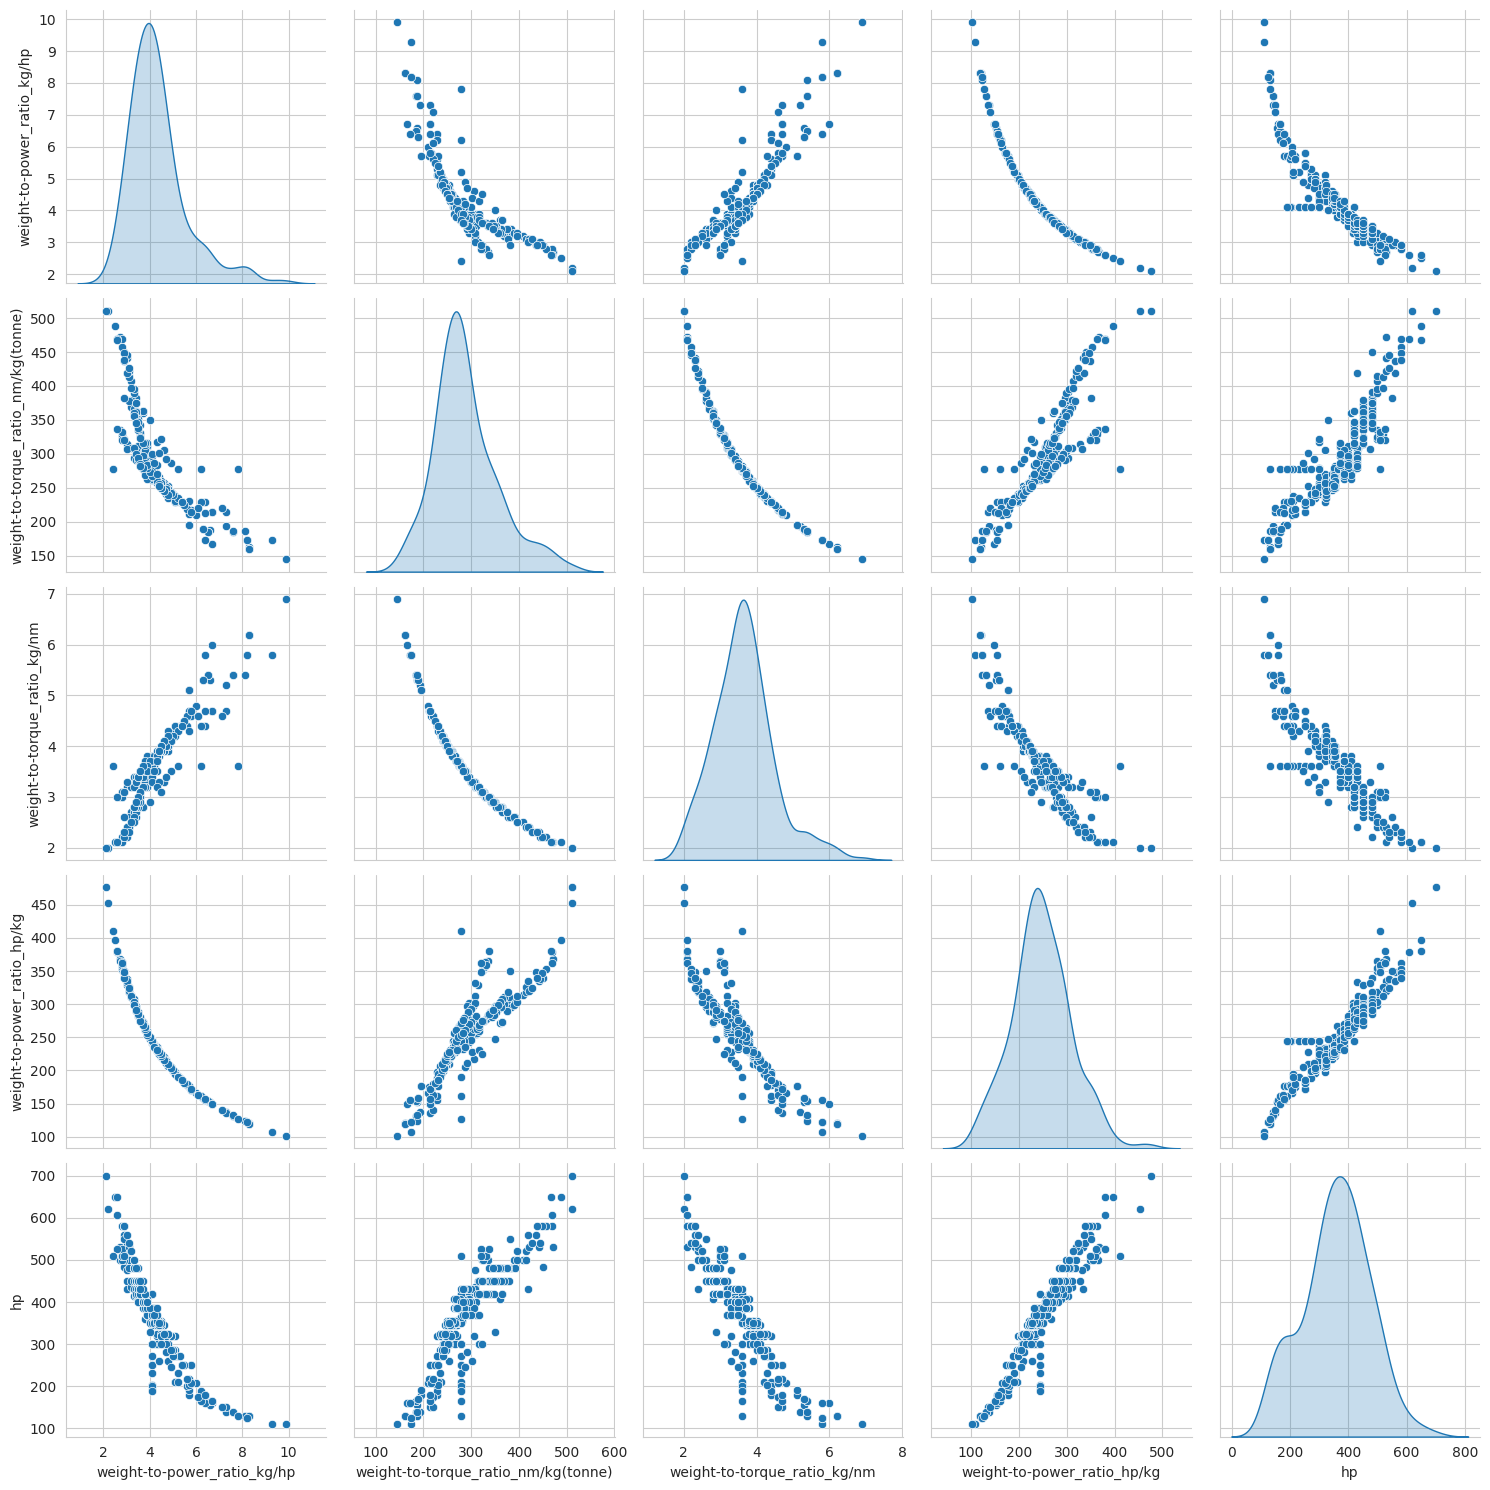

In [62]:


# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# 2. Select top correlated features
def get_top_correlations(correlation_matrix, n=5):
    correlations = correlation_matrix.abs().unstack()
    correlations = correlations[correlations < 1].sort_values(ascending=False)
    return correlations.head(n)

top_correlations = get_top_correlations(correlation_matrix)
print("Top Correlations:")
print(top_correlations)

# 3. Individual Scatter Plots for top correlations
for (var1, var2), correlation in top_correlations.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=var1, y=var2)
    plt.title(f'Scatter plot of {var1} vs {var2}\nCorrelation: {correlation:.2f}')
    plt.tight_layout()
    plt.show()

# 4. Pairplot with selected features (if still desired)
selected_features = list(set([var for pair in top_correlations.index for var in pair]))
sns.pairplot(data[selected_features], diag_kind='kde', height=3)
plt.tight_layout()
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Function to prepare data for a specific prediction task
def prepare_data(df, target_column, features_to_exclude=[]):
    # Exclude the target column and any other specified columns from features
    features = df.columns.drop([target_column] + features_to_exclude)

    # Select only numeric columns
    numeric_features = df[features].select_dtypes(include=[np.number]).columns

    X = df[numeric_features]
    y = df[target_column]

    return X, y

# Function to train and evaluate a model
def train_evaluate_model(X, y, model_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.tight_layout()
    plt.show()

    return model, scaler


2. Fuel Efficiency Prediction
Fuel Efficiency Prediction Results:
Mean Squared Error: 516955.27384841384
R-squared Score: -287637.1991865694


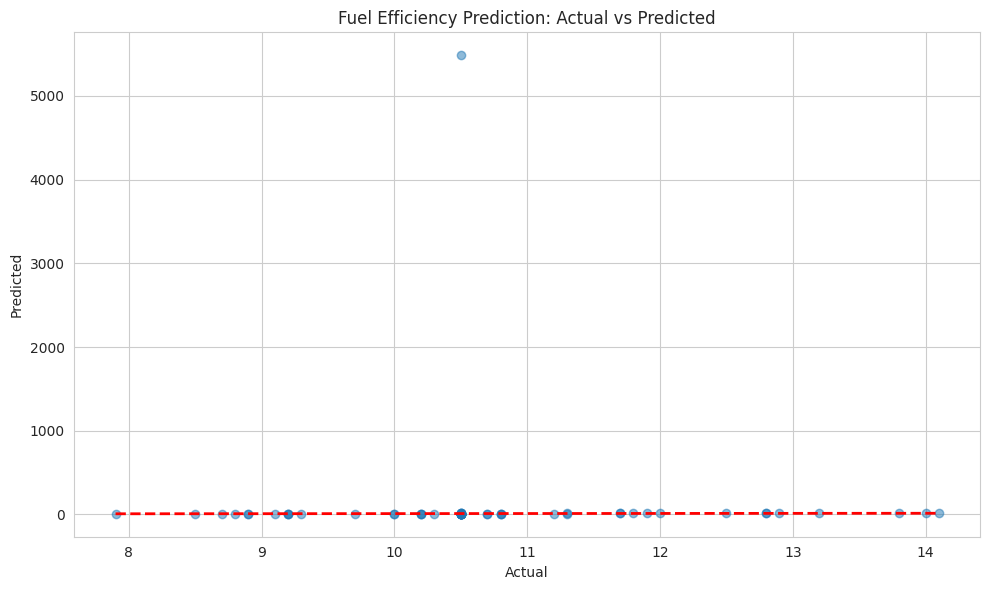

In [66]:
# 2. Fuel Efficiency Prediction
print("\n2. Fuel Efficiency Prediction")
X_fuel, y_fuel = prepare_data(data, 'fuel_consumption_combined')  # Replace with your actual fuel efficiency column
fuel_model, fuel_scaler = train_evaluate_model(X_fuel, y_fuel, "Fuel Efficiency Prediction")



3. Performance Prediction
Performance Prediction Results:
Mean Squared Error: 0.0005408275862068814
R-squared Score: 0.9993295262242401


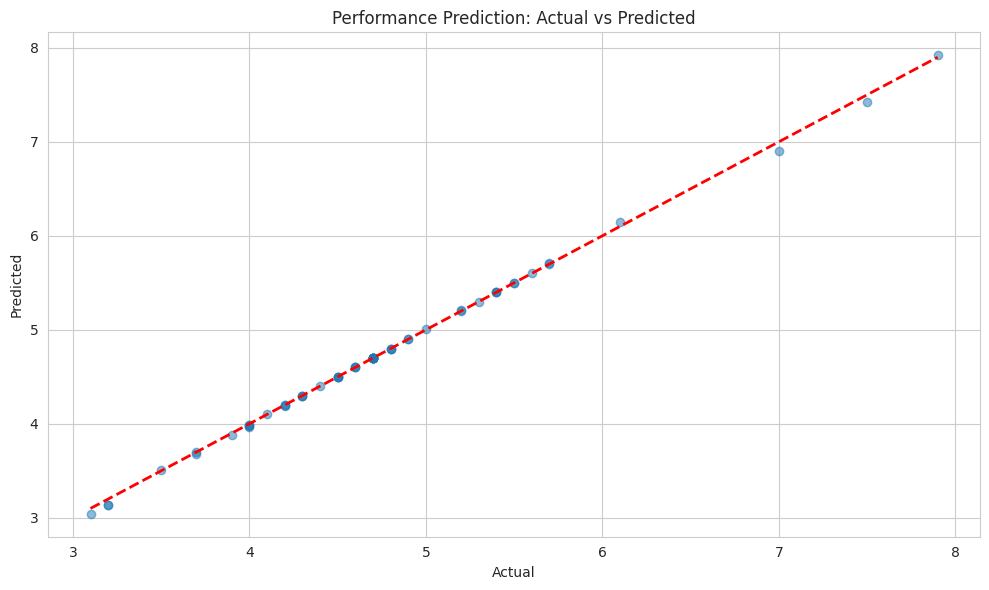

In [67]:
# 3. Performance Prediction (using acceleration as an example)
print("\n3. Performance Prediction")
X_perf, y_perf = prepare_data(data, 'acceleration_0-100km/h')  # Replace with your actual performance column
perf_model, perf_scaler = train_evaluate_model(X_perf, y_perf, "Performance Prediction")



4. Emission Prediction
Emission Prediction Results:
Mean Squared Error: 121.71400689655167
R-squared Score: 0.8481385636943515


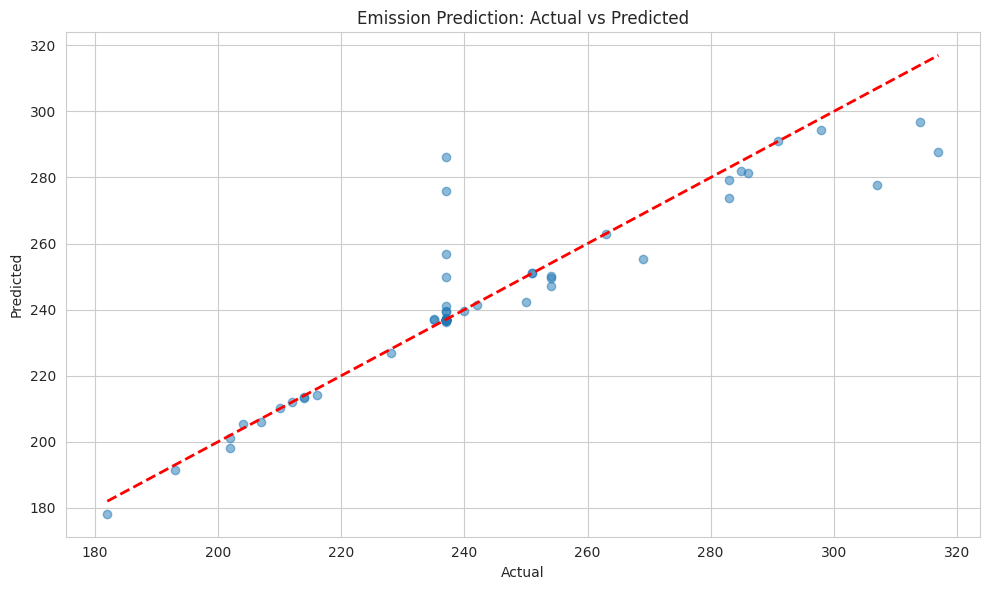

In [70]:
# 4. Emission Prediction
print("\n4. Emission Prediction")
X_emission, y_emission = prepare_data(data, 'co2_emissions')  # Replace with your actual emission column
emission_model, emission_scaler = train_evaluate_model(X_emission, y_emission, "Emission Prediction")


Linear Regression Results:
Mean Squared Error: 339.71963276759266
R-squared Score: 0.576134968449751


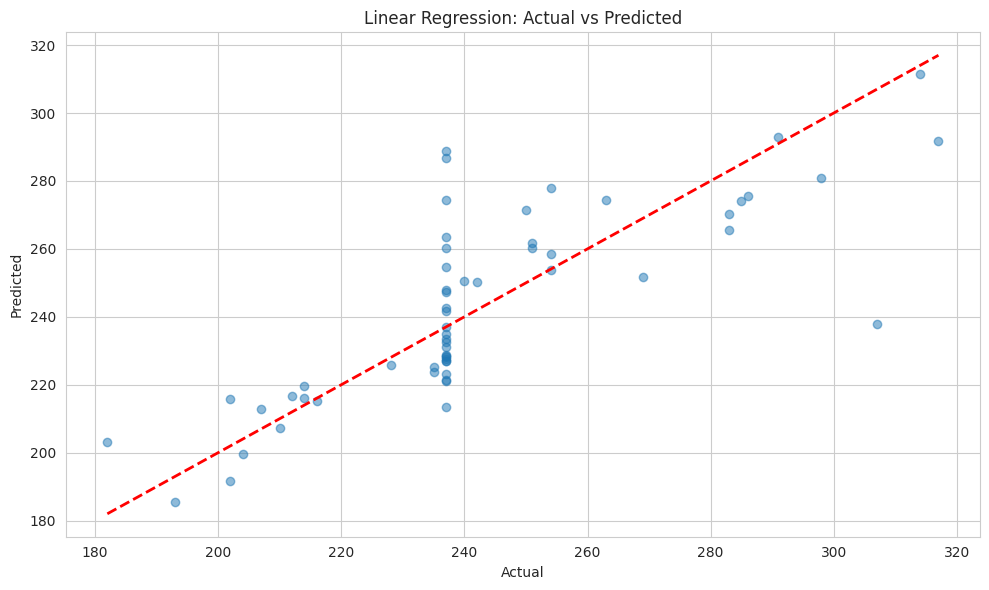

Random Forest Results:
Mean Squared Error: 121.71400689655167
R-squared Score: 0.8481385636943515


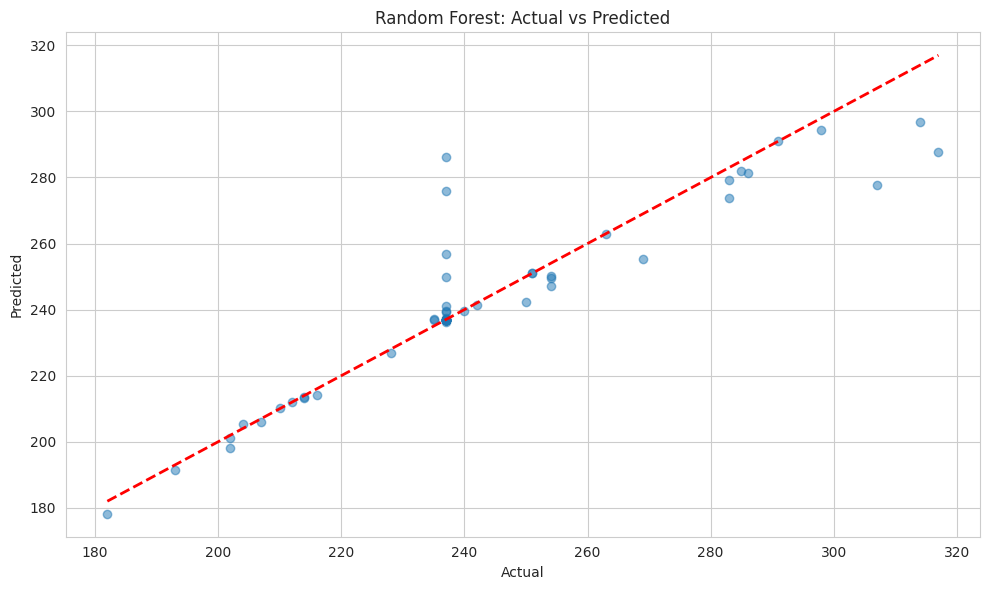

Gradient Boosting Results:
Mean Squared Error: 115.74405294867361
R-squared Score: 0.8555872198048506


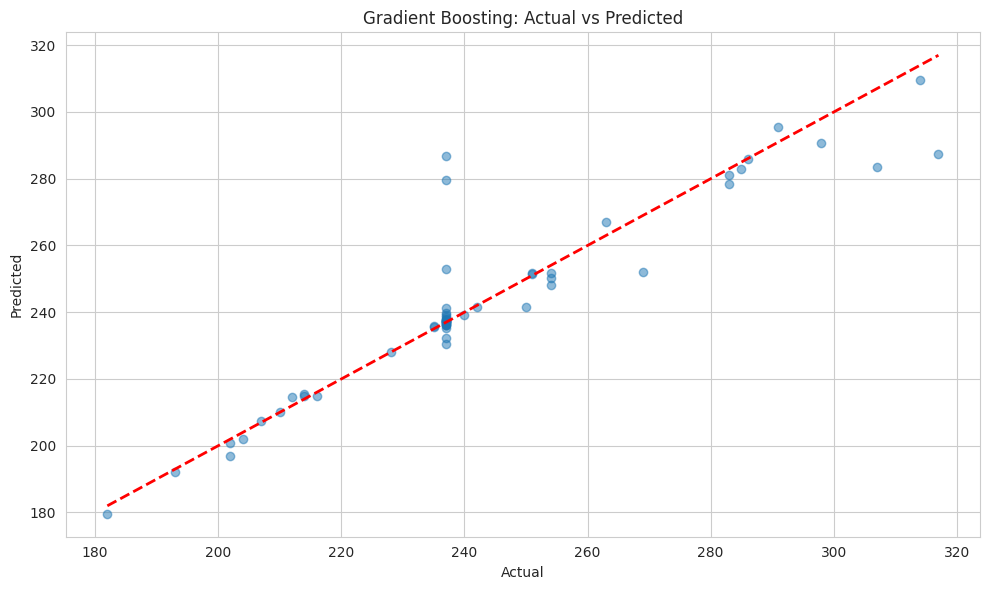

XGBoost Results:
Mean Squared Error: 123.40055606686029
R-squared Score: 0.8460342719539534


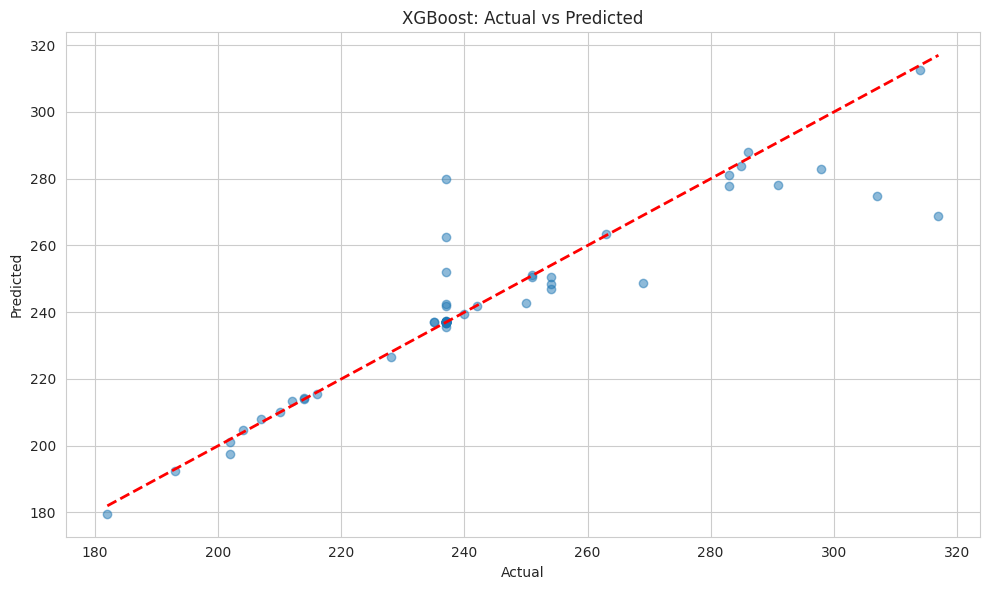

Support Vector Regression Results:
Mean Squared Error: 698.4146730508053
R-squared Score: 0.12859449712652482


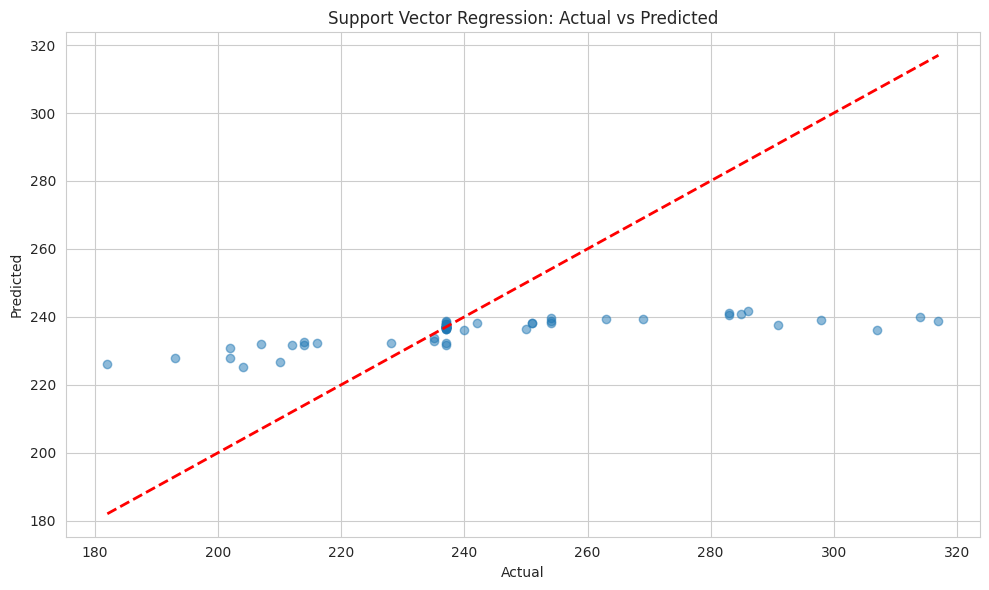


Summary of R-squared scores:
Gradient Boosting: 0.8555872198048506
Random Forest: 0.8481385636943515
XGBoost: 0.8460342719539534
Linear Regression: 0.576134968449751
Support Vector Regression: 0.12859449712652482


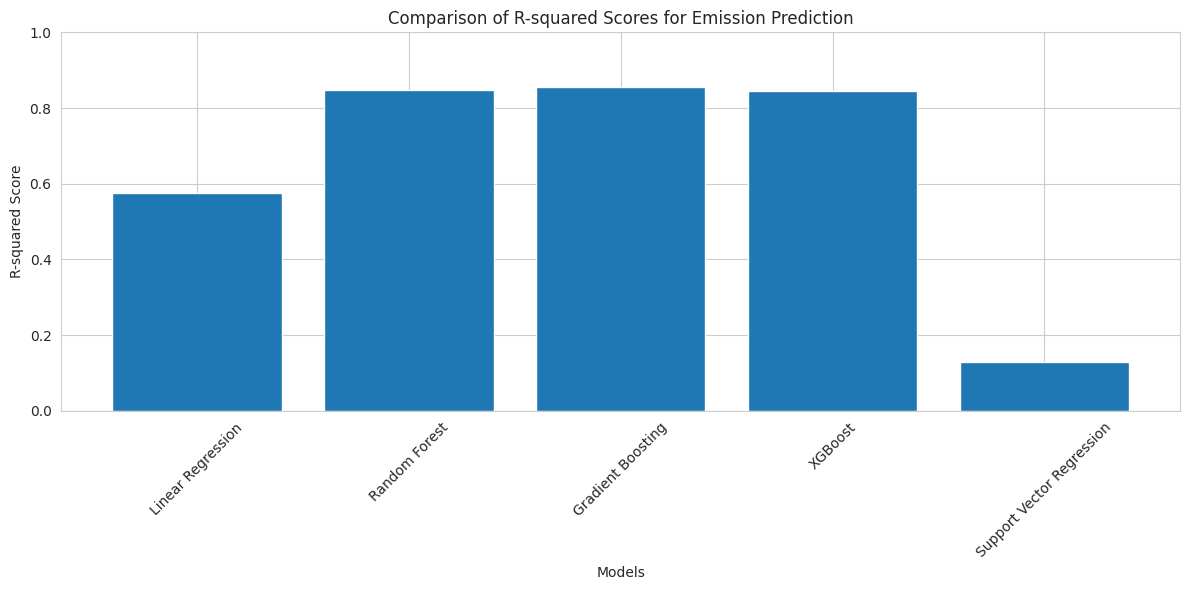

In [71]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

def prepare_data(df, target_column, features_to_exclude=[]):
    features = df.columns.drop([target_column] + features_to_exclude)
    numeric_features = df[features].select_dtypes(include=[np.number]).columns
    X = df[numeric_features]
    y = df[target_column]
    return X, y

def train_evaluate_model(X, y, model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Results:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name}: Actual vs Predicted")
    plt.tight_layout()
    plt.show()

    return model, scaler, r2

# Prepare data for Emission Prediction
X_emission, y_emission = prepare_data(data, 'co2_emissions')  # Replace with your actual emission column

# List of models to try
models = [
    (LinearRegression(), "Linear Regression"),
    (RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest"),
    (GradientBoostingRegressor(n_estimators=100, random_state=42), "Gradient Boosting"),
    (XGBRegressor(n_estimators=100, random_state=42), "XGBoost"),
    (SVR(kernel='rbf'), "Support Vector Regression")
]

# Train and evaluate each model
results = []
for model, name in models:
    _, _, r2 = train_evaluate_model(X_emission, y_emission, model, name)
    results.append((name, r2))

# Print summary of results
print("\nSummary of R-squared scores:")
for name, r2 in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"{name}: {r2}")

# Plot comparison of R-squared scores
plt.figure(figsize=(12, 6))
names, scores = zip(*results)
plt.bar(names, scores)
plt.title("Comparison of R-squared Scores for Emission Prediction")
plt.xlabel("Models")
plt.ylabel("R-squared Score")
plt.ylim(0, 1)  # R-squared is always between 0 and 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()